In [1]:
#connecting to a database

import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

import pandas as pd

Selecting data for season 2011

In [2]:
matches2011 = cur.execute('''SELECT * FROM Matches WHERE Season = "2011" ''')

dfmach2011 = pd.DataFrame(matches2011)
dfmach2011.columns = [x[0] for x in matches2011.description]
dfmach2011

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D
...,...,...,...,...,...,...,...,...,...
987,44870,E0,2011,2012-05-13,Sunderland,Man United,0,1,A
988,44871,E0,2011,2012-05-13,Swansea,Liverpool,1,0,H
989,44872,E0,2011,2012-05-13,Tottenham,Fulham,2,0,H
990,44873,E0,2011,2012-05-13,West Brom,Arsenal,2,3,A


List of teams from seazon 2011

In [3]:
uniqueteam2011 = dfmach2011['HomeTeam'].unique()
uniqueteam2011.sort()
uniqueteam2011

array(['Aachen', 'Arsenal', 'Aston Villa', 'Augsburg', 'Bayern Munich',
       'Blackburn', 'Bochum', 'Bolton', 'Braunschweig', 'Chelsea',
       'Cottbus', 'Dortmund', 'Dresden', 'Duisburg', 'Ein Frankfurt',
       'Erzgebirge Aue', 'Everton', 'FC Koln', 'Fortuna Dusseldorf',
       'Frankfurt FSV', 'Freiburg', 'Fulham', 'Greuther Furth', 'Hamburg',
       'Hannover', 'Hansa Rostock', 'Hertha', 'Hoffenheim', 'Ingolstadt',
       'Kaiserslautern', 'Karlsruhe', 'Leverkusen', 'Liverpool',
       "M'gladbach", 'Mainz', 'Man City', 'Man United', 'Munich 1860',
       'Newcastle', 'Norwich', 'Nurnberg', 'Paderborn', 'QPR',
       'Schalke 04', 'St Pauli', 'Stoke', 'Stuttgart', 'Sunderland',
       'Swansea', 'Tottenham', 'Union Berlin', 'Werder Bremen',
       'West Brom', 'Wigan', 'Wolfsburg', 'Wolves'], dtype=object)

In [4]:
len(uniqueteam2011)

56

Number of goals during games "in home" for every team

In [5]:
matchesgoalshome = cur.execute('''SELECT HomeTeam AS Team, SUM(FTHG) AS HomeGoals
                                FROM Matches WHERE Season = "2011" 
                                GROUP BY HomeTeam''')

dfmachgoalshome = pd.DataFrame(matchesgoalshome)
dfmachgoalshome.columns = [x[0] for x in matchesgoalshome.description]
dfmachgoalshome.head()


,Team,HomeGoals
0,Aachen,15
1,Arsenal,39
2,Aston Villa,20
3,Augsburg,20
4,Bayern Munich,49


Number of goals during games "away" for every team

In [6]:
#matchesgoals = cur.execute('''SELECT HomeTeam, AwayTeam, FTHG, FTAG, FTR, 
#                                COUNT(FTHG), COUNT(FTAG) 
#                                FROM Matches WHERE Season = "2011" 
#                                GROUP BY HomeTeam''')

matchesgoalsaway = cur.execute('''SELECT AwayTeam AS Team, SUM(FTAG) AS AwayGoals
                                FROM Matches WHERE Season = "2011" 
                                GROUP BY AwayTeam''')

dfmachgoalsaway = pd.DataFrame(matchesgoalsaway)
dfmachgoalsaway.columns = [x[0] for x in matchesgoalsaway.description]
dfmachgoalsaway.head()

,Team,AwayGoals
0,Aachen,15
1,Arsenal,35
2,Aston Villa,17
3,Augsburg,16
4,Bayern Munich,28


Creating a table with goals for every team

In [7]:
dfgoals = dfmachgoalsaway.join(dfmachgoalshome.set_index('Team'), on = 'Team')

In [8]:
dfgoals['All']=dfgoals['HomeGoals']+dfgoals['AwayGoals']
dfgoals.head()

,Team,AwayGoals,HomeGoals,All
0,Aachen,15,15,30
1,Arsenal,35,39,74
2,Aston Villa,17,20,37
3,Augsburg,16,20,36
4,Bayern Munich,28,49,77


Counting the number of "Wins in Home" for every team

In [9]:
wininhome = cur.execute('''SELECT HomeTeam AS Team, COUNT(FTR) AS WinsInHome
                        FROM Matches WHERE Season = "2011" AND FTR = "H"
                        GROUP BY HomeTeam
                                ''')

dfwininhome = pd.DataFrame(wininhome)
dfwininhome.columns = [x[0] for x in wininhome.description]
dfwininhome.tail()

,Team,WinsInHome
51,Werder Bremen,8
52,West Brom,6
53,Wigan,5
54,Wolfsburg,10
55,Wolves,3


Counting the number of "Losings in Home" for every team

In [10]:
losehome = cur.execute('''SELECT HomeTeam AS Team, COUNT(FTR) AS LoseInHome
                        FROM Matches WHERE Season = "2011" AND FTR = "A"
                        GROUP BY HomeTeam
                                ''')

dflosehome = pd.DataFrame(losehome)
dflosehome.columns = [x[0] for x in losehome.description]
dflosehome = dflosehome.append({'Team':'Hannover', 'LoseInHome':'0'}, ignore_index=True)

In [11]:
dflosehome = dflosehome.append({'Team':'Man City', 'LoseInHome':'0'}, ignore_index=True)

In [12]:
dflosehome

,Team,LoseInHome
0,Aachen,7
1,Arsenal,3
2,Aston Villa,8
3,Augsburg,4
4,Bayern Munich,2
5,Blackburn,12
6,Bochum,7
7,Bolton,11
8,Braunschweig,3
9,Chelsea,4


Counting the number of "Wins Away" for every team

In [13]:
winaway = cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS WinAway
                        FROM Matches WHERE Season = "2011" AND FTR = "A"
                        GROUP BY AwayTeam
                                ''')

dfwinaway = pd.DataFrame(winaway)
dfwinaway.columns = [x[0] for x in winaway.description]
dfwinaway.tail()

,Team,WinAway
51,Werder Bremen,3
52,West Brom,7
53,Wigan,6
54,Wolfsburg,3
55,Wolves,2


Counting the number of "Wins Away" for every team

In [14]:
loseaway = cur.execute('''SELECT AwayTeam AS Team, COUNT(FTR) AS LoseAway
                        FROM Matches WHERE Season = "2011" AND FTR = "H"
                        GROUP BY AwayTeam
                                ''')

dfloseaway = pd.DataFrame(loseaway)
dfloseaway.columns = [x[0] for x in loseaway.description]
dfloseaway.tail()

,Team,LoseAway
51,Werder Bremen,9
52,West Brom,7
53,Wigan,10
54,Wolfsburg,11
55,Wolves,10


New DataFrame for all numbers

In [15]:
allframesnew = dfgoals.merge(dfwininhome, on='Team').merge(dflosehome, on='Team').merge(dfwinaway, on='Team').merge(dfloseaway, on='Team')
allframesnew

,Team,AwayGoals,HomeGoals,All,WinsInHome,LoseInHome,WinAway,LoseAway
0,Aachen,15,15,30,4,7,2,8
1,Arsenal,35,39,74,12,3,9,7
2,Aston Villa,17,20,37,4,8,3,6
3,Augsburg,16,20,36,6,4,2,8
4,Bayern Munich,28,49,77,14,2,9,5
5,Blackburn,22,26,48,6,12,2,11
6,Bochum,18,23,41,7,7,3,10
7,Bolton,23,23,46,4,11,6,11
8,Braunschweig,16,21,37,6,3,4,6
9,Chelsea,24,41,65,12,4,6,6


Creating a list of unique dates to use it in APIs

In [16]:
# list of dates 
weatherconditions = cur.execute('''SELECT Date FROM Matches WHERE Season = "2011" ''')

dfweather = pd.DataFrame(weatherconditions)
dfweather.columns = [x[0] for x in weatherconditions.description]

In [17]:
undates = dfweather['Date'].unique()

In [18]:
undates


array(['2012-03-31', '2011-12-11', '2011-08-13', '2011-11-27',
       '2012-02-18', '2012-01-20', '2012-02-04', '2012-04-21',
       '2011-09-18', '2011-10-23', '2011-10-01', '2012-03-03',
       '2011-08-27', '2012-03-17', '2011-11-06', '2012-05-05',
       '2012-04-11', '2011-12-17', '2012-02-03', '2011-10-29',
       '2012-01-22', '2011-12-03', '2012-04-14', '2012-03-25',
       '2012-03-10', '2012-04-07', '2011-11-19', '2011-10-14',
       '2011-09-24', '2012-04-28', '2011-12-18', '2012-03-02',
       '2012-03-16', '2012-02-17', '2011-08-06', '2011-11-04',
       '2011-09-16', '2011-07-15', '2012-05-06', '2012-02-11',
       '2011-10-02', '2012-03-30', '2011-10-22', '2011-08-26',
       '2011-08-07', '2012-02-24', '2011-07-17', '2012-02-12',
       '2011-08-22', '2011-09-09', '2012-04-01', '2011-09-25',
       '2012-04-20', '2011-11-25', '2012-03-09', '2011-11-07',
       '2011-09-10', '2011-08-21', '2011-09-26', '2012-03-26',
       '2011-10-30', '2012-02-13', '2012-02-26', '2011-

In [19]:
sampledata = dfweather.loc[1]

Starting to use APIs

In [20]:
import requests
from datetime import timezone

In [21]:
import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [22]:
keys = get_keys("/Users/kalinazeligowska/.secret/darksky.json")

api_key = keys['api_key']

In [23]:
lat = 52.52437
long = 13.41053
#date1=undates[1]

In [24]:
#response = requests.get("https://api.darksky.net/forecast/" + api_key + "/52.52, 13.41")
#print(response.status_code)

In [25]:
#response = requests.get("https://api.darksky.net/forecast/" + api_key + "/" + str(lat) + "," + str(long) + "," + date1 + "T18:00:00" + "?exclude=currently,minutely,hourly,alerts,flags")
#print(response.status_code)

In [26]:
#test = response.json()

In [27]:
#response.json()['daily']['data'][0]['icon']

In [28]:
testdates = ['2014-02-21', '2014-01-19', '2014-12-20']

In [29]:
testdates

['2014-02-21', '2014-01-19', '2014-12-20']

In [30]:
list_of_unique_dates = list(undates)
list_of_unique_dates
#list_of_unique_dates = 
#print(list_of_unidates.sort())
#print(list_of_dates)

['2012-03-31',
 '2011-12-11',
 '2011-08-13',
 '2011-11-27',
 '2012-02-18',
 '2012-01-20',
 '2012-02-04',
 '2012-04-21',
 '2011-09-18',
 '2011-10-23',
 '2011-10-01',
 '2012-03-03',
 '2011-08-27',
 '2012-03-17',
 '2011-11-06',
 '2012-05-05',
 '2012-04-11',
 '2011-12-17',
 '2012-02-03',
 '2011-10-29',
 '2012-01-22',
 '2011-12-03',
 '2012-04-14',
 '2012-03-25',
 '2012-03-10',
 '2012-04-07',
 '2011-11-19',
 '2011-10-14',
 '2011-09-24',
 '2012-04-28',
 '2011-12-18',
 '2012-03-02',
 '2012-03-16',
 '2012-02-17',
 '2011-08-06',
 '2011-11-04',
 '2011-09-16',
 '2011-07-15',
 '2012-05-06',
 '2012-02-11',
 '2011-10-02',
 '2012-03-30',
 '2011-10-22',
 '2011-08-26',
 '2011-08-07',
 '2012-02-24',
 '2011-07-17',
 '2012-02-12',
 '2011-08-22',
 '2011-09-09',
 '2012-04-01',
 '2011-09-25',
 '2012-04-20',
 '2011-11-25',
 '2012-03-09',
 '2011-11-07',
 '2011-09-10',
 '2011-08-21',
 '2011-09-26',
 '2012-03-26',
 '2011-10-30',
 '2012-02-13',
 '2012-02-26',
 '2011-12-19',
 '2012-03-11',
 '2011-11-26',
 '2012-04-

In [31]:
def get_info (dates):
    reslist = []
    for date in dates:
        response = requests.get("https://api.darksky.net/forecast/" + api_key + "/" + str(lat) + "," + str(long) + "," + date + "T18:00:00" + "?exclude=currently,minutely,hourly,alerts,flags")
        resp = response.json() 
        if (resp['daily']['data'][0]['icon']) == None:
            reslist.append('sunny')
        else: 
            reslist.append(resp['daily']['data'][0]['icon'])
            
    return reslist


In [32]:
get_info(testdates)

['rain', 'cloudy', 'rain']

Some visualizations

In [34]:
import matplotlib
import matplotlib.pyplot as plt

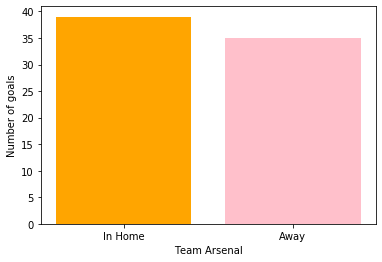

<Figure size 432x288 with 0 Axes>

In [52]:
plt.bar('In Home',allframesnew['HomeGoals'][1],color = "orange")
plt.bar('Away',allframesnew['AwayGoals'][1], color = "pink")

plt.xlabel('Team {}'.format(allframesnew['Team'][1]))
plt.ylabel('Number of goals')
plt.show()
plt.savefig("./images/{}.png".format(allframesnew['Team'][1]))

Text(0.5, 1.0, 'Number of goals for Teams in Sezon 2011')

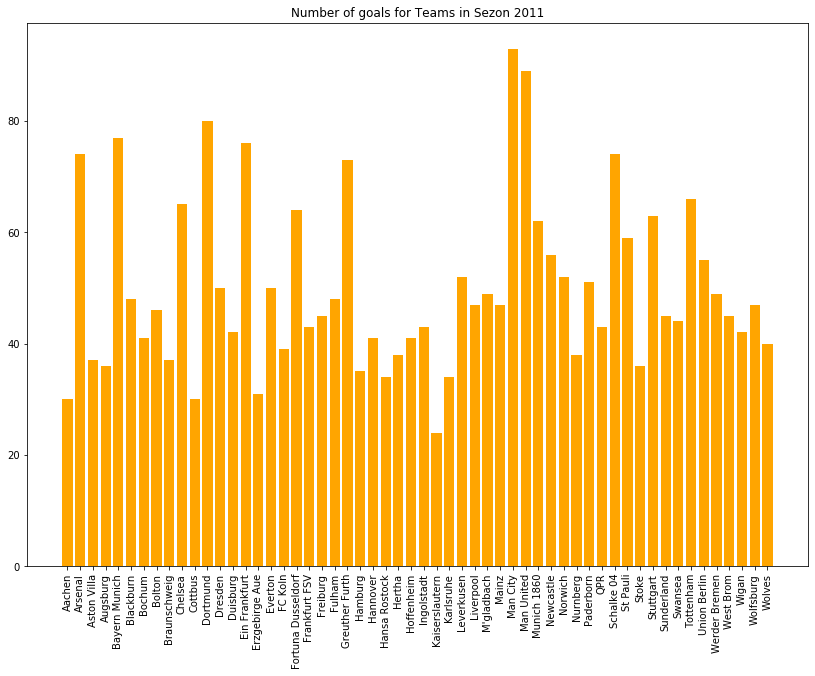

In [53]:
fig = plt.figure(figsize=(14,10)) 
plt.bar(allframesnew['Team'], allframesnew['All'],color = "orange")
plt.xticks(rotation="vertical")
plt.title("Number of goals for Teams in Sezon 2011")

In [52]:
get_info(testdates)

{'date': {'time': 1419030000,
  'summary': 'Light rain in the afternoon and evening.',
  'icon': 'rain',
  'sunriseTime': 1419059760,
  'sunsetTime': 1419087300,
  'moonPhase': 0.96,
  'precipIntensity': 0.0016,
  'precipIntensityMax': 0.0163,
  'precipIntensityMaxTime': 1419087840,
  'precipProbability': 0.98,
  'precipType': 'rain',
  'temperatureHigh': 46.62,
  'temperatureHighTime': 1419079200,
  'temperatureLow': 38,
  'temperatureLowTime': 1419098400,
  'apparentTemperatureHigh': 39.33,
  'apparentTemperatureHighTime': 1419078960,
  'apparentTemperatureLow': 30.65,
  'apparentTemperatureLowTime': 1419098400,
  'dewPoint': 35.78,
  'humidity': 0.8,
  'windSpeed': 13.51,
  'windGust': 32.45,
  'windGustTime': 1419109200,
  'windBearing': 243,
  'cloudCover': 0.69,
  'uvIndex': 0,
  'uvIndexTime': 1419073380,
  'visibility': 6.089,
  'temperatureMin': 34.95,
  'temperatureMinTime': 1419085140,
  'temperatureMax': 46.62,
  'temperatureMaxTime': 1419079200,
  'apparentTemperatureMin':